# 퍼셉트론 Perceptron (1)
- 인공 신경망(Artificial Neural Network, ANN)의 구성 요소로서 `다수의 값을 입력받아` `하나의 값으로 출력`하는 알고리즘
- perception과 neuron의 합성어, 인공뉴런 이라고도 부름

## 1. 퍼셉트론의 이해
- 인공신경망(딥러닝)의 기원이 되는 알고리즘
- `하나 이상의 신호를 입력받아` 어떠한 계산을 수행한 후 `하나의 output`을 출력한다
- 퍼셉트론은 `1`과 `0`의 신호만 가질 수 있다
- 신호가 `흐르면 1`, `흐르지 않으면 0`이다

### 1) input이 2개인 퍼셉트론
- 기호:
    - $x_1$ 과 $x_2$ -> 입력 신호
    - $y$ -> 출력 신호
    - $w_1$ 과 $w_2$ -> 가중치 (w: weight)
- $x$ 와 가중치 $w$ 를 곱한 값을 모두 더하여 하나의 값($y$)으로 만들어낸다
- 입력 신호가 뉴런에 보내질 때는 각각 고유한 가중치가 곱해지고 그 값들을 모두 더해서 나온 값($y$)이 어떠한 임계값(θ)을 넘을 때만 `1`로 출력한다.
- 신경망에서 만들어진 값($y$)을 적절한 출력값으로 변환해 주는 함수를 `활성화 함수`라고 한다
- 입력 신호와 출력 신호를 담고 있는 원($x$, $y$)은 `노드`, 혹은 `뉴런`이라 부른다

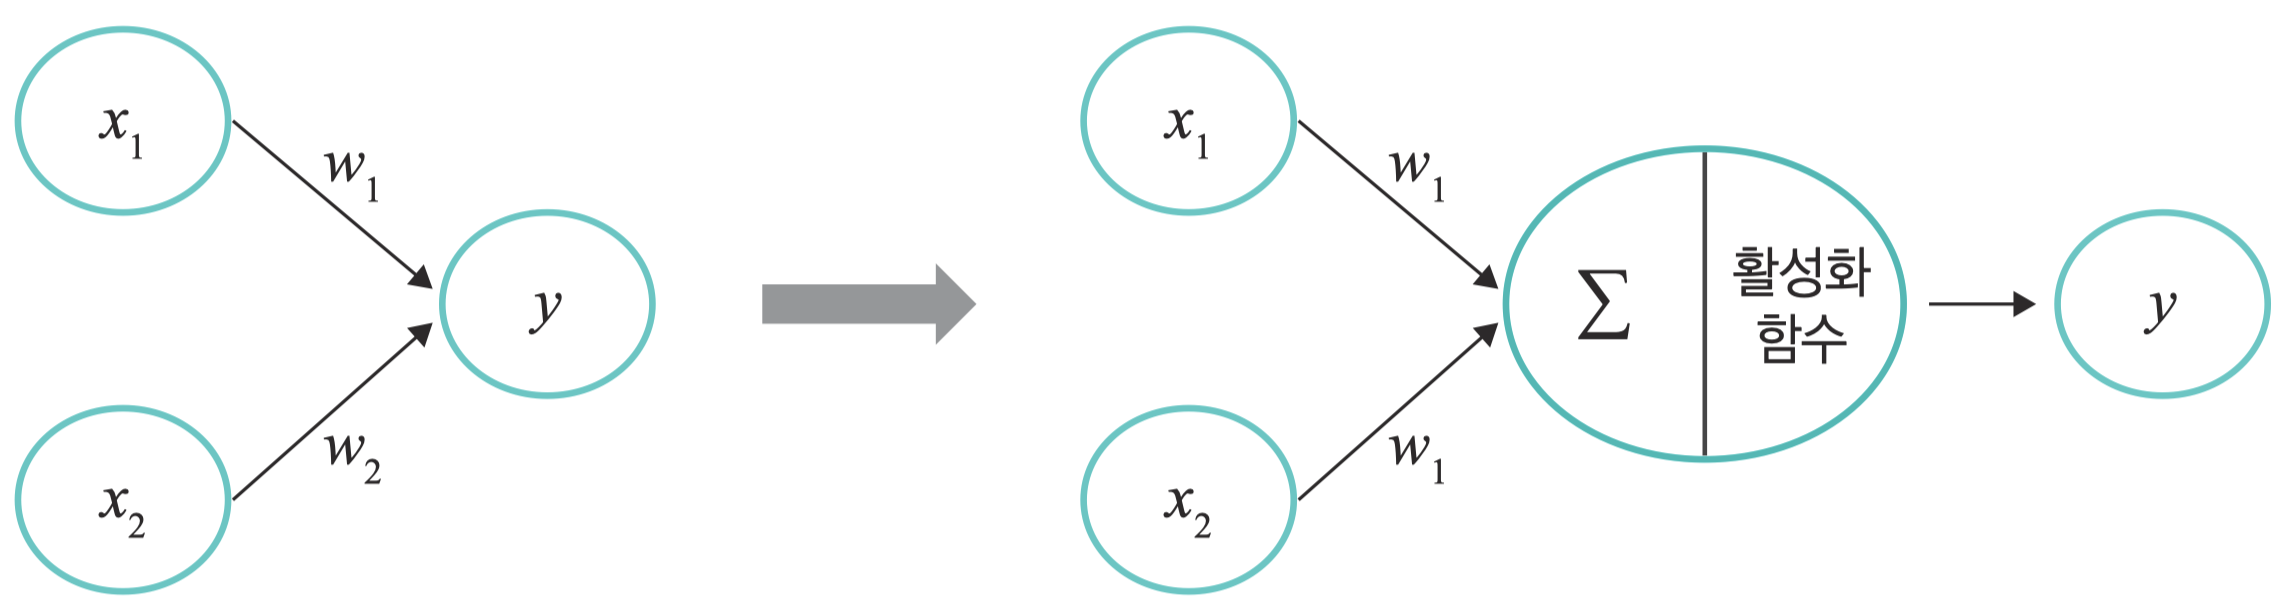

In [1]:
from IPython.display import display, Image
display(Image('image18_per.png'))

- y를 수식으로 나타내기:

$$y = \left \{ \begin{array}{cc} {0(w_1x_1 + w_2x_2 \leq \theta)}\\{1(w_1x_1 + w_2x_2 > \theta)}\end{array} \right.$$

### 2) 논리회로 (Logic Circuit)
- 논리 연산을 통해 전기 장치를 제어하는 통로
- 컴퓨터 및 기타 전기 장치를 작동하게 만드는 기본 부품이다
- 불 대수 (Boolean Algebra, i.e., AND, OR, NOT)를 이용하여 설계한다
- 여러 입력을 해도 1개의 출력만 나온다
- 퍼셉트론과 논리회로의 원리가 동일하기 때문에 퍼셉트론을 사용하여 논리회로를 구현할 수 있다

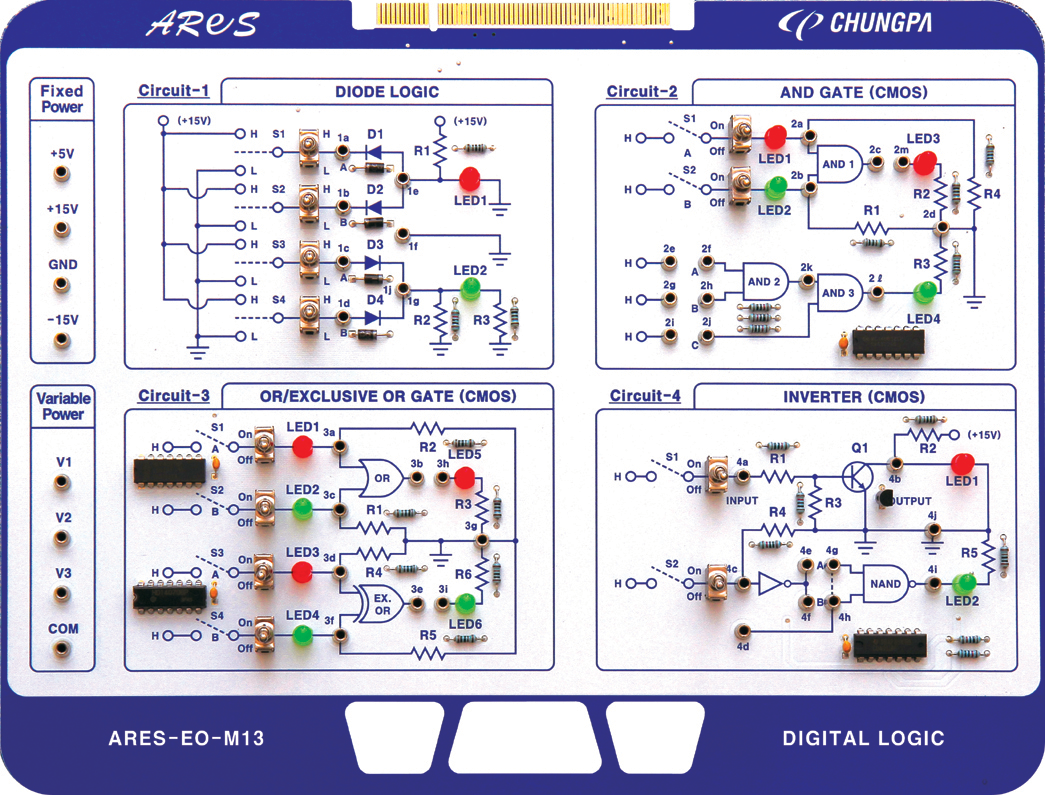

In [2]:
from IPython.display import display, Image
display(Image('image19_logic.png'))

### 3) 게이트 (Gate)
- 논리 회로의 기초 구성 요소
- 각 게이트는 논리 연산 하나를 구현한다

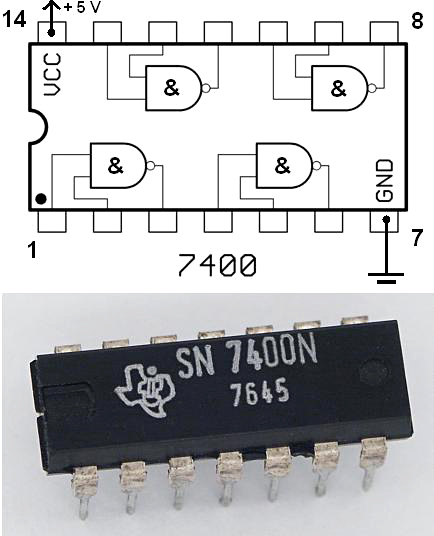

In [3]:
from IPython.display import display, Image
display(Image('image20_gate.jpg'))

- 게이트의 종류

|종류|출력값 = 1 True|출력값 = 0 False|분석종류|
|--|--|--|--|
|AND|a 와 b 모두 True|그 외 나머지||
|OR|그 외 나머지|a 와 b 모두 False|회귀분석|
|NOT|False (입력값 한 개)|True (입력값 한 개)||
|XOR|a 와 b 동일하지 않음|a 와 b 동일||

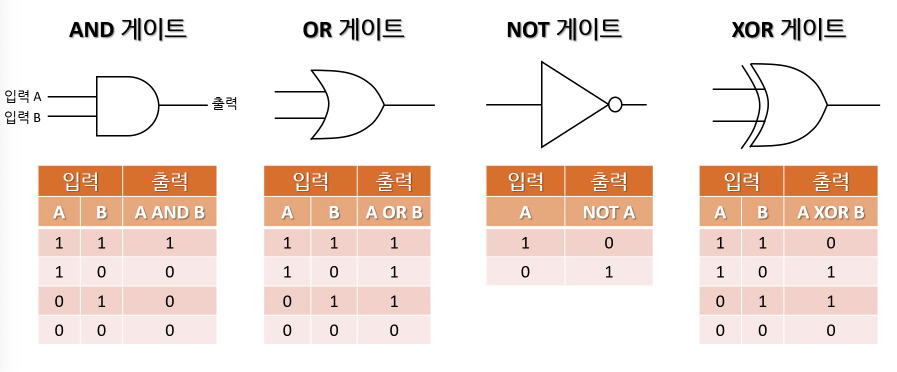

In [4]:
from IPython.display import display, Image
display(Image('image21_gate2.png'))

## 2. 퍼셉트론 구현하기 (AND 게이트)
- 퍼셉트론과 논리회로의 원리가 동일하기 때문에 퍼셉트론을 사용하여 논리회로를 구현할 수 있다

### 1) 패키지 참조하기

In [5]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from pandas import DataFrame


from tensorflow.keras.models import Sequential # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense      # 모델 객체에 학습층을 쌓기 위한 클래스
from tensorflow.keras.optimizers import SGD    # 옵티마이저 - 단층퍼셉트론 할 때 사용하는 옵티마이저
from tensorflow.keras.losses import mse        # 손실 함수 - AND/OR게이트에서 사용할 손실 함수

### 2) 데이터셋 준비하기
- 랜덤 시드값 고정

In [6]:
np.random.seed(777)

- 데이터셋 구성

In [7]:
# AND GATE
train_x = np.array([[0,0], [1,0], [0,1], [1,1]])  # 2차원이니까 행렬 배열이다 matrix
train_y = np.array([[0], [0], [0], [1]])

### 3) 데이터 전처리
> 간단한 데이터이므로 이 예제에서는 수행하지 않는다
- 이 때 결측치 등을 확인할 수 있다
    - `데이터프레임.isna().sum()`
### 4) 탐색적 데이터 분석
- `.flatten()`: numpy array를 무조건 1차원으로 풀어버린다

In [8]:
label = train_y.flatten()
df = DataFrame(train_x, index=label, columns=['x1', 'x2'])
df.index.name = 'y'
df

,x1,x2
y,,
0,0,0
0,1,0
0,0,1
1,1,1


### 5) 데이터셋 분할하기
> 훈련을 위한 데이터 자체가 워낙 양이 적기 때문에 이 예제에서는 진행하지 않는다.

### 6) 모델 개발
- 모델 정의

In [9]:
my_model = Sequential() # sequential이라는 객체 생성

# 이 객체에 .add() 함수를 사용해 Dense라는 학습층을 쌓는다
my_model.add(Dense(1, input_shape=(2,), activation='linear')) # 첫번째 층
    # input_shape = (2,) -> 입력되는 값의 차원은 2차원
    # activation ='linear' -> 회귀분석 전용 활성화함수

# 만든 모델을 .compile() 함수를 사용해 엮는다
my_model.compile(optimizer=SGD(), loss=mse, metrics=['acc'])
    # optimizer = SGD() -> 단층 퍼셉트론 전용 옵티마이저
    # loss = mse -> 퍼셉트론 및 회귀분석 전용 손실함수
    # metrics = ['acc'] -> 논리연산 및 분류 전용 평가지표
        # metrics에 훈련용 평가지표, 검증용 평가지표를 명시해줘야 된다 - 예) ['acc', 'mae'] -> [0]은 훈련, [1]은 검증
        # 그러나 지금 예제이서는 데이터 분할을 안 했기에 훈련데이터에 대한 척도만 정해준 것
# 우리가 입력한 머신러닝 수치 출력 
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 학습하기

In [10]:
my_hist = my_model.fit(train_x, train_y, epochs=500)
    # 이 모델을 가장 근접한 값이 나올때까지 500번 연습해보라는 의미
    # 학습은 하면 할수록 더 똑똑해진다 -> 이 예제에서는 정확도가 하면 할수록 더 높아질 것

result_df = DataFrame(my_hist.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500


1/1 [==============================] - 0s 187ms/step - loss: 1.6029 - acc: 0.7500
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 1.5255 - acc: 0.7500
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 1.4528 - acc: 0.7500
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 1.3846 - acc: 0.7500
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 1.3205 - acc: 0.7500
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 1.2603 - acc: 0.7500
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 1.2038 - acc: 0.7500
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 1.1507 - acc: 0.7500
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 1.1008 - acc: 0.7500
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 1.0539 - acc: 0.7500
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 1.0098 - acc: 0.7

,loss,acc
epochs,,
1,1.602891,0.75
2,1.525494,0.75
3,1.452826,0.75
4,1.384591,0.75
5,1.320511,0.75
...,...,...
496,0.076815,1.00
497,0.076725,1.00
498,0.076635,1.00


### 7) 학습 결과 평가하기
- 평가결과 시각화

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning

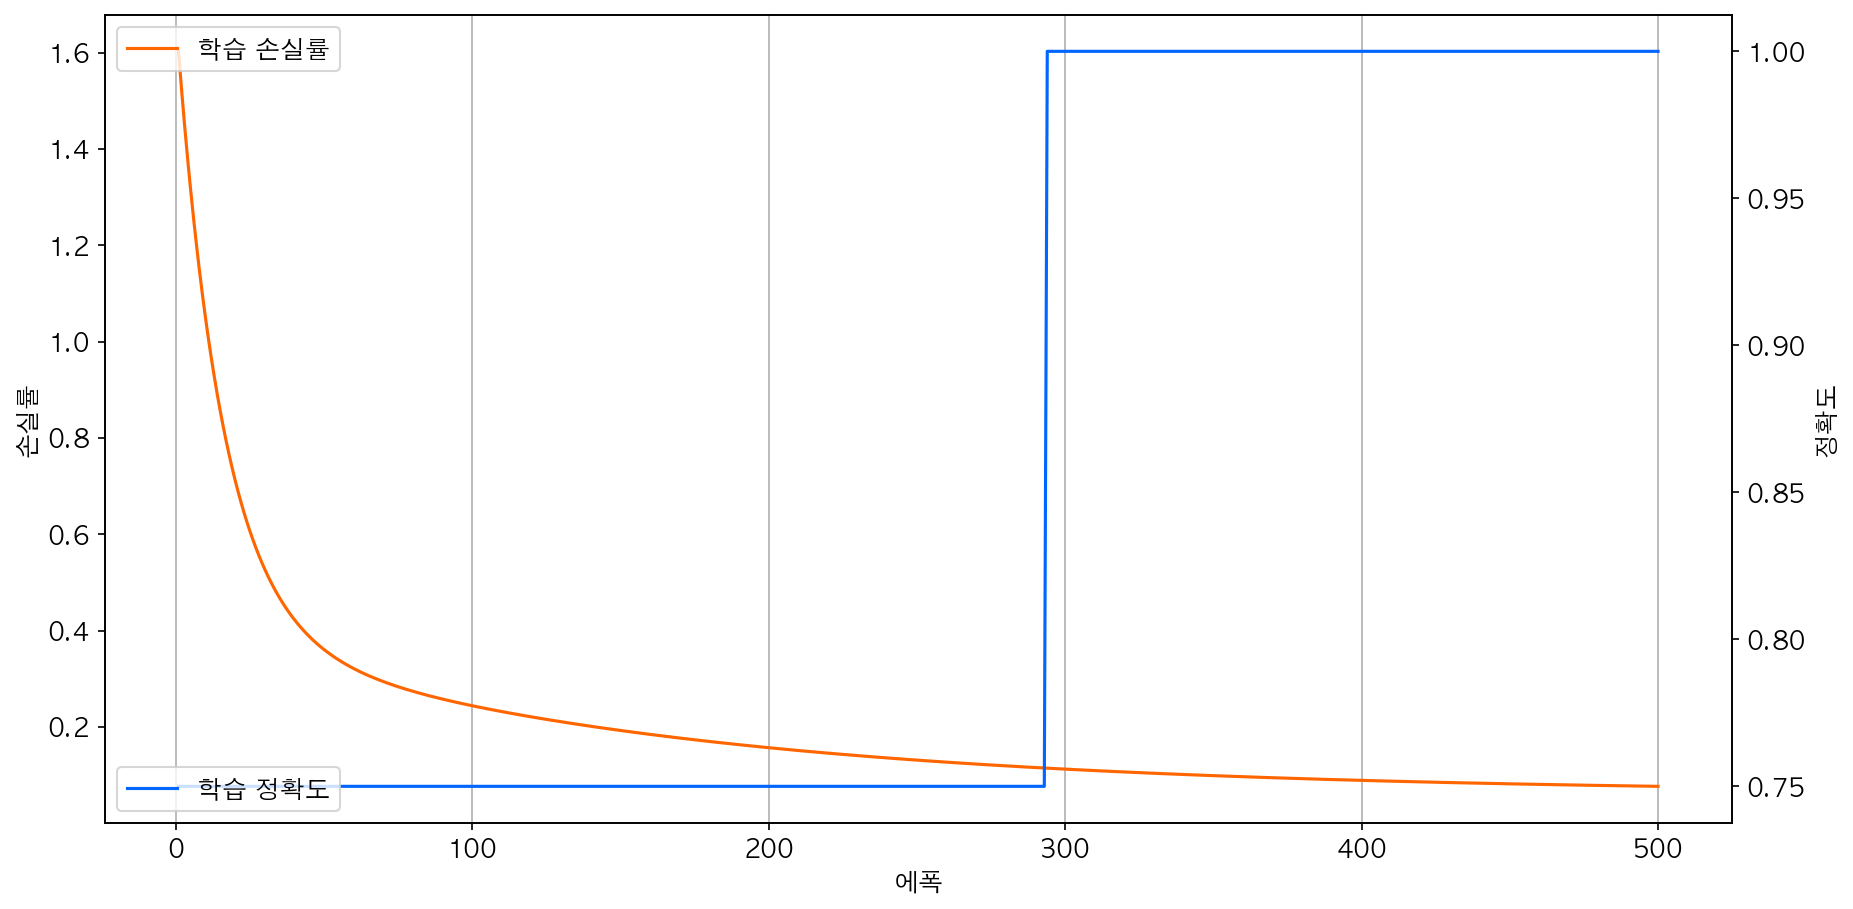

In [11]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12

fig, ax1 = plt.subplots(1, 1, figsize=(14, 7), dpi=150)
ax2 = ax1.twinx()

sb.lineplot(data = result_df,
             x = result_df.index,
             y = 'loss',
             color = '#ff6600',
             label = '학습 손실률',
             ax = ax1)
ax1.set_xlabel('에폭')
ax1.set_ylabel('손실률')
ax1.legend(loc='upper left')
ax1.grid(axis='x')

sb.lineplot(data=result_df,
             x = result_df.index,
             y = 'acc',
             color = '#0066ff',
             label = '학습 정확도',
             ax = ax2)
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')

plt.show()
plt.close()

> 데이터가 4개 밖에 없으니까 정확도는 1단계, 2단계, 3단계 이렇게 단계별로 갈 수 밖에 없다
>
> 손실률은 여러번 맞춰볼 수록 줄어든다 -> 똑똑해진다
> 손실률 같은 경우 데이터가 많을수록 이렇게 반듯하게 안나오고 지그재그 자글자글하게 뜰 것이다
>
> 대략 에폭이 400번쯤 넘어갈 때 정확도가 100%가 되기 시작한 것을 확인할 수 있다.
>
> 100% 정확도 이후의 학습은 필요가 없기 때문에 100% 정확도의 지점을 확인하기 위해서 시각화를 하는 것이다.
> 100% 정확도 이후에 브레이크를 걸기 위해서 (후에 배울 EarlyStopping 등)

- 모델 성능 평가

In [12]:
ev = my_model.evaluate(train_x, train_y)
print('<이 모델의 성능>', '\n최종 손실률: %0.2f%%, 최종 정확도: %0.2f%%' % (ev[0]*100, ev[1]*100))

1/1 [==============================] - 0s 85ms/step - loss: 0.0764 - acc: 1.0000
<이 모델의 성능> 
최종 손실률: 7.64%, 최종 정확도: 100.00%


- 가중치, 편향 확인

In [13]:
weight, bias = my_model.get_weights()
print('가중치: %s' % weight.flatten())
print('편향: %s' % bias.flatten())

가중치: [0.32205716 0.35766864]
편향: [-0.06005497]


### 8) 학습 결과 적용하기
- 단일 데이터에 대한 예측치 산정
    - 산정하다: 계산하여 알아내다

In [14]:
r00 = my_model.predict([[0,0]])
r00

1/1 [==============================] - 0s 61ms/step


array([[-0.06005497]], dtype=float32)

In [15]:
result = '%s AND %s => %s' % (bool(0), bool(0), bool(round(r00[0,0])))
result

'False AND False => False'

- 학습 데이터 전체를 활용하여 예측값 만들기

In [16]:
print('train_x: \n', train_x)
r = my_model.predict(train_x).flatten()
print('predict: \n',r)
for a in range(len(train_x)):
    # print(a)
    result = '%s AND %s => %s' % (bool(train_x[a][0]), 
                                  bool(train_x[a][1]), 
                                  bool(round(r[a])))
    print(result)

train_x: 
 [[0 0]
 [1 0]
 [0 1]
 [1 1]]
1/1 [==============================] - 0s 15ms/step
predict: 
 [-0.06005497  0.2620022   0.29761368  0.6196708 ]
False AND False => False
True AND False => False
False AND True => False
True AND True => True


In [17]:
df['예측값'] = r.reshape(-1).round()
df

,x1,x2,예측값
y,,,
0,0,0,-0.0
0,1,0,0.0
0,0,1,0.0
1,1,1,1.0


## 3. 퍼셉트론 구현하기 (OR 게이트)

### 1) 패키지 참조하기
> 위에서 함

### 2) 데이터셋 준비
- 랜던 시드값 고정

In [18]:
np.random.seed(777)

- 데이터셋 구성

In [19]:
train_x = np.array([[0,0], [1,0], [0,1], [1,1]])
train_y = np.array([[0], [1], [1], [1]])

### 3) 데이터 전처리
> 간단한 데이터이므로 이 예제에서는 수행하지 않는다

### 4) 탐색적 데이터 분석

In [20]:
label = train_y.flatten()
df = DataFrame(train_x, index=label, columns=['x1', 'x2'])
df.index.name = 'y'
df

,x1,x2
y,,
0,0,0
1,1,0
1,0,1
1,1,1


### 5) 데이터셋 분할
> 훈련을 위한 데이터 자체가 워낙 양이 적기 때문에 이 예제에서는 진행하지 않음

### 6) 모델 개발
- 모델 정의

In [21]:
my_model_or = Sequential()
my_model_or.add(Dense(1, input_shape = (2,), activation = 'linear'))
my_model_or.compile(optimizer = SGD(), loss=mse, metrics=['acc'])
my_model_or.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 학습하기

In [22]:
my_hist_or = my_model_or.fit(train_x, train_y, epochs=500)

result_df_or = DataFrame(my_hist_or.history)
result_df_or['epochs'] = result_df_or.index+1
result_df_or.set_index('epochs', inplace=True)
result_df_or

Epoch 1/500
1/1 [==============================] - 0s 150ms/step - loss: 0.1018 - acc: 1.0000
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1013 - acc: 1.0000
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1008 - acc: 1.0000
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1003 - acc: 1.0000
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0998 - acc: 1.0000
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0993 - acc: 1.0000
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0988 - acc: 1.0000
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0984 - acc: 1.0000
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0980 - acc: 1.0000
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0976 - acc: 1.0000
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 0.097

1/1 [==============================] - 0s 3ms/step - loss: 0.0896 - acc: 1.0000
Epoch 40/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0894 - acc: 1.0000
Epoch 41/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0893 - acc: 1.0000
Epoch 42/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0891 - acc: 1.0000
Epoch 43/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0889 - acc: 1.0000
Epoch 44/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0887 - acc: 1.0000
Epoch 45/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0885 - acc: 1.0000
Epoch 46/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0883 - acc: 1.0000
Epoch 47/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0881 - acc: 1.0000
Epoch 48/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0880 - acc: 1.0000
Epoch 49/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0878 -

,loss,acc
epochs,,
1,0.101834,1.0
2,0.101285,1.0
3,0.100759,1.0
4,0.100253,1.0
5,0.099767,1.0
...,...,...
496,0.063971,1.0
497,0.063962,1.0
498,0.063953,1.0


### 7) 학습 결과 평가
- 평가 결과 시각화

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning

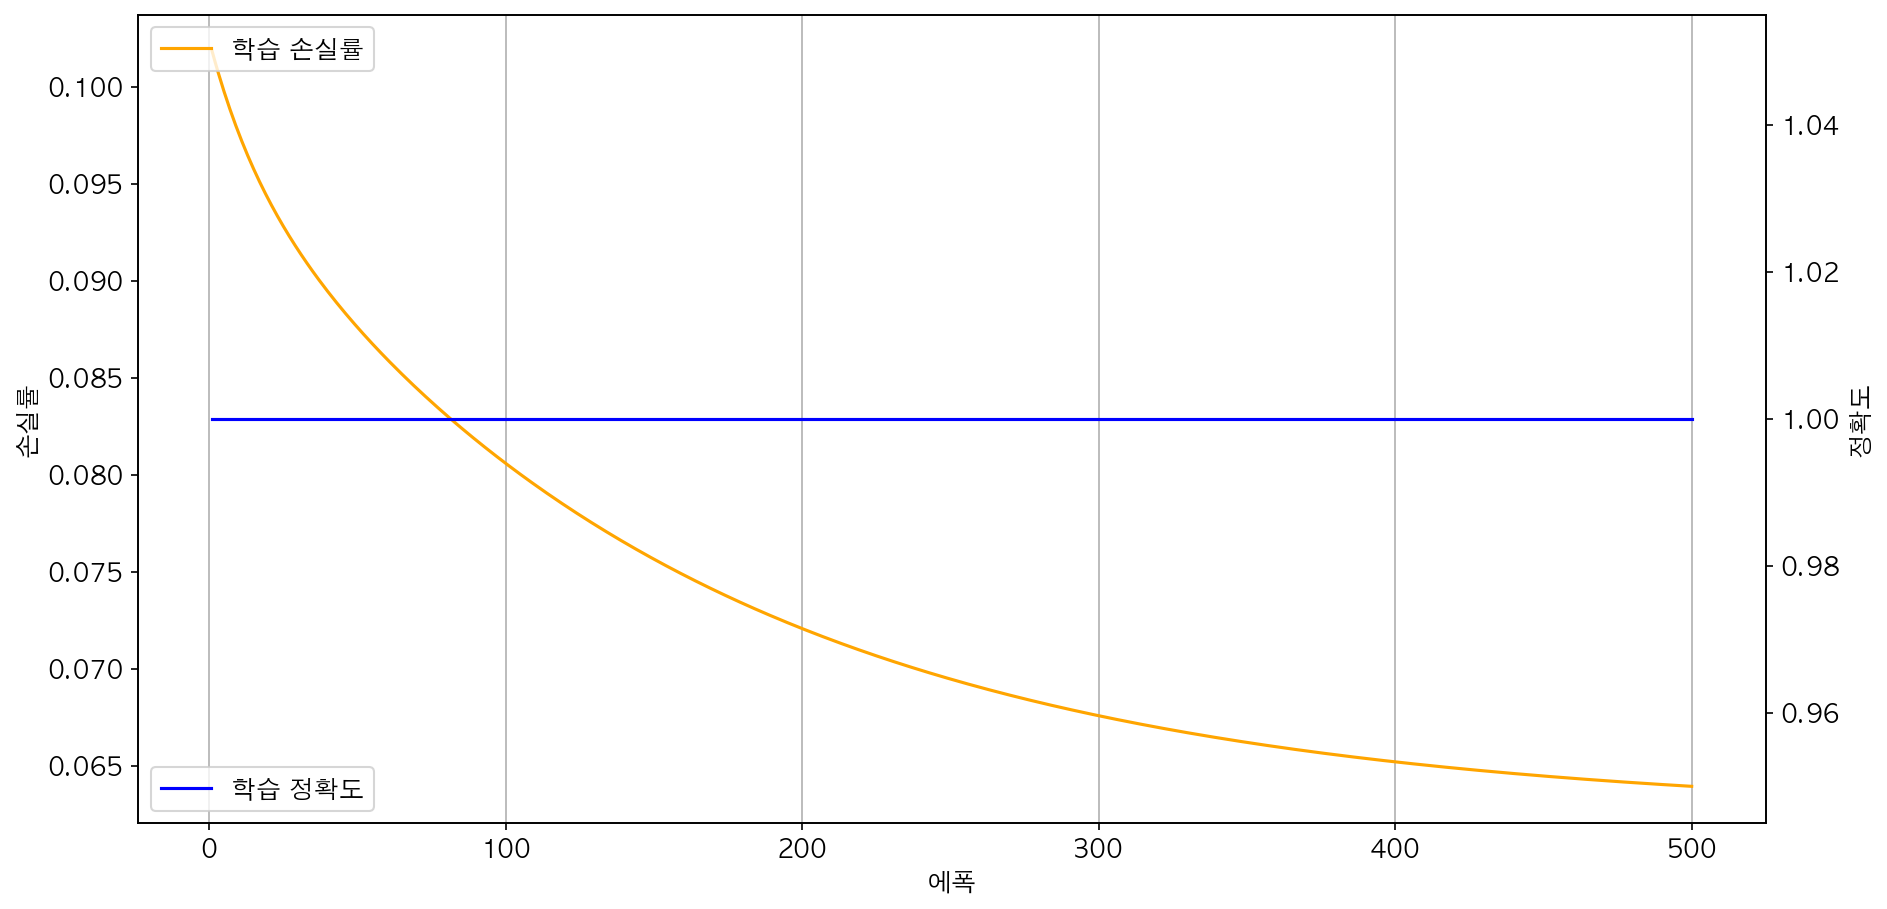

In [23]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12

fig, ax1 = plt.subplots(1, 1, figsize = (14, 7), dpi = 150)
ax2 = ax1.twinx()
sb.lineplot(data=result_df_or,
            x=result_df_or.index,
            y='loss',
            color='orange',
            label = '학습 손실률',
            ax = ax1)
ax1.set_xlabel('에폭')
ax1.set_ylabel('손실률')
ax1.legend(loc='upper left')
ax1.grid(axis='x')

sb.lineplot(data=result_df_or,
            x=result_df_or.index,
            y='acc',
            color = 'blue',
            label='학습 정확도',
            ax=ax2)
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')

plt.show()
plt.close()

- 모델 성능 평가

In [24]:
ev = my_model_or.evaluate(train_x, train_y)
print('훈련 손실률: %0.2f%%, 훈련 정확도: %0.2f%%' % (ev[0]*100, ev[1]*100))

1/1 [==============================] - 0s 65ms/step - loss: 0.0639 - acc: 1.0000
훈련 손실률: 6.39%, 훈련 정확도: 100.00%


- 가중치, 편향 확인

In [25]:
weight, bias = my_model_or.get_weights()
print('가중치: %s' % weight.flatten())
print('편향: %s' % bias.flatten())

가중치: [0.5554783 0.5475024]
편향: [0.18892534]


### 8) 학습 결과 적용
- 단일 데이터에 대한 예측치 산정

In [26]:
r01 = my_model_or.predict([[0,1]])
r01

1/1 [==============================] - 0s 41ms/step


array([[0.7364277]], dtype=float32)

- 학습 데이터 전체를 활용하여 예측값 만들기

In [27]:
r_or = my_model_or.predict(train_x)
r_or

1/1 [==============================] - 0s 18ms/step


array([[0.18892534],
       [0.7444036 ],
       [0.7364277 ],
       [1.291906  ]], dtype=float32)

In [28]:
df['예측값'] = r_or.reshape(-1).round()
df

,x1,x2,예측값
y,,,
0,0,0,0.0
1,1,0,1.0
1,0,1,1.0
1,1,1,1.0
